# **Technologies for Anti-Money Laundering and Financial Crime**
# Lab Exercise 8 - March 2023
### *COMP-1831-M01-2022-23*

Welcome, to this hands-on lab session focusing on dashboard visualizations using Streamlit. As future professionals dedicated to combating money laundering and financial crime, harnessing the power of data visualization is crucial in your efforts to identify, track, and mitigate illicit financial activities. Dashboards provide a comprehensive, user-friendly platform to synthesize and analyze complex datasets, enabling you to rapidly detect patterns, trends, and anomalies that might otherwise go unnoticed. By mastering Streamlit, a cutting-edge open-source framework designed to create custom web applications for machine learning and data science, you'll be well-equipped to build interactive, real-time visualizations that can significantly enhance your ability to tackle financial crime. Today, we will explore the development of these dashboards, focusing on techniques that will allow you to streamline your work and maximize your impact in this critical domain.

### What is Streamlit?

Streamlit is an open-source Python library designed to simplify the process of creating web applications for data science and machine learning projects. With its intuitive, easy-to-use interface, Streamlit allows users to quickly transform Python scripts into interactive, data-driven web applications without requiring extensive knowledge of web development or front-end frameworks.

One of the key advantages of Streamlit is its ability to accelerate the development process, as it automatically updates the web application as you modify your code. This enables rapid iteration and facilitates seamless collaboration between team members. Streamlit supports various visualization libraries, such as Matplotlib, Plotly, and Altair, allowing users to create rich, interactive visualizations with minimal effort.

Streamlit's core features include:

Widgets: Built-in components that allow users to interact with the application, such as sliders, buttons, and dropdown menus.
Caching: A mechanism to store intermediate results, which reduces the need to rerun expensive computations and improves the application's performance.
Custom Components: The ability to create and use reusable components, extending Streamlit's functionality and enabling seamless integration with other libraries and frameworks.
Theming: Customizable appearance and styling options to tailor the look and feel of your application.

# Install Dependencies

In [1]:
!pip install -q streamlit==1.20.0 faker
!npm install -q localtunnel


added 22 packages, and audited 23 packages in 4s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities


npm notice 
npm notice New major version of npm available! 8.19.2 -> 9.6.2
npm notice Changelog: <https://github.com/npm/cli/releases/tag/v9.6.2>
npm notice Run `npm install -g npm@9.6.2` to update!
npm notice 


# Why LocalTunnel?

Google Colaboratory, or Colab for short, is a cloud-based Jupyter notebook environment that provides a convenient platform for running Python code, machine learning experiments, and data analysis. However, it does not natively support the direct exposure of web applications, like those built using Streamlit, to the internet.

To make a Streamlit application running in a Colab environment accessible via a public URL, we need a solution that can create a secure tunnel from the Colab instance to the outside world. This is where LocalTunnel comes into play.

LocalTunnel is a service that enables you to expose your locally running web applications to the internet by creating a secure, temporary public URL. When you use LocalTunnel in conjunction with Colab, it allows you to establish a connection between the Streamlit application running inside the Colab environment and the external internet, making your application accessible to others.

By using LocalTunnel with Google Colaboratory, you can:

Share your Streamlit application with collaborators or clients without needing to deploy it on a dedicated web server.
Test and iterate on your application in real-time while working in the Colab environment.
Make your Streamlit application accessible for demonstrations or presentations, even if it's still in development.
In summary, LocalTunnel enables you to expose Streamlit applications running in the Google Colaboratory environment to the internet, making it easier to share, test, and showcase your work.

# Basic Dashboard

Let's create a very basic dashboard with just a title and some text. Notice the use of `%%writefile` magic command. It takes all the contents of the cell and writes them to a file (in this case `app.py`)

In [2]:
%%writefile app.py
import streamlit as st

st.title("COMP 1831 - Hello World")

st.write("Welcome to the lab session of COMP1831, focusing on Streamlit dashboard visualisations. In today's session, students will be guided through hands-on exercises designed to build practical skills in creating interactive data visualizations using the Streamlit framework. By working on real-world examples, students will gain a strong understanding of Streamlit's core features and learn to develop dynamic, interactive dashboards. This lab session is a valuable opportunity to apply the knowledge acquired in lectures, ultimately enhancing the ability to communicate complex data-driven insights effectively.")


Writing app.py


# Run Streamlit

The code snippet provided below contains two commands, each followed by an ampersand (&). The ampersand is used to run commands in the background, allowing the execution of multiple commands simultaneously. Here's a breakdown of each command:

`!streamlit run /content/app.py &>/content/logs.txt &`:

This command starts the Streamlit application by running the app.py script located in the /content directory. The ! at the beginning of the line is used to execute shell commands within a notebook environment, like Google Colab.

&> is used to redirect both the standard output (stdout) and the standard error (stderr) to a file, in this case, /content/logs.txt. This means that any output or error messages generated by the Streamlit application will be saved in the logs.txt file instead of being displayed in the notebook.

The final & runs the command in the background, allowing the notebook to continue executing subsequent commands without waiting for the Streamlit application to terminate.

`!npx localtunnel --port 8501 &>/content/localtunnel.txt &`:

This command uses npx to run LocalTunnel, which creates a secure tunnel from the specified port to the internet. npx is a package runner for Node.js that allows you to run packages without installing them globally.

The --port 8501 flag specifies that LocalTunnel should expose port 8501, which is the default port used by Streamlit. By establishing the tunnel, the Streamlit application running on port 8501 in the Colab environment will be accessible via a public URL.

Similar to the first command, &>/content/localtunnel.txt redirects both stdout and stderr to a file named localtunnel.txt in the /content directory, and the final & runs the command in the background.

In [3]:
!streamlit run /content/app.py &>/content/logs.txt &
!npx localtunnel --port 8501 &>/content/localtunnel.txt &

OSError: Background processes not supported.

## Reload on code changes:

In order to make our dashboard refresh automatically to code changes, we need to follow the following steps:
1. Navigate to the dashboard URL
2. Click on the right top corner menu icon 
3. Click Settings 
4. Toggle the "Run on Save" option.

# Data Generator

The code below defines two functions to generate synthetic transaction data. generate_transaction_row creates a single transaction row with a given timestamp, a random amount between amount_min and amount_max, and a randomly selected purpose and country. generate_timeseries_data generates a DataFrame containing a specified number of transaction rows with increasing timestamps, calling generate_transaction_row for each row and passing additional keyword arguments.

We will be using these functions to dynamically populate our dashboard with data.

In [4]:
%%writefile data.py

import random
import pandas as pd

from datetime import datetime, timedelta

from faker import Faker

faker = Faker()


def generate_transaction_row(
    timestamp: datetime,
    amount_min: float,
    amount_max: float,
    purposes: list,
    countries: list
):
    row = {
      "timestamp": timestamp,
      "amount": float("{0:.2f}".format(random.uniform(amount_min, amount_max))),
      "purpose": (
        random.choice(purposes)
        if purposes
        else random.choice(('Entertainment', 'Holiday', 'Transportation', 'Bills', 'Medical', 'Misc'))
      ),
      "country": random.choice(countries) if countries else faker.country_code('alpha-3')
    }
    return row
    

def generate_timeseries_data(num_rows: int, start_timestamp: datetime, **kwargs):
    data = []
    now = datetime.now()
    timestamp = start_timestamp or datetime.now()
    for _ in range(num_rows):
        timestamp += timedelta(seconds=random.randint(1, 3600))
        params = dict(timestamp=timestamp, **kwargs)
        data.append(generate_transaction_row(**params))
    return pd.DataFrame(data)


Writing data.py


# Dashboard

The code below creates a Streamlit GUI for generating and reviewing synthetic transaction data. The GUI consists of a sidebar with data parameters and general configuration options and a main section displaying the generated data in a table. The data parameters widget allows users to configure transaction amount range, purposes, countries, and the number of rows to generate. Clicking the "Generate" button calls the generate_clicked function, which generates data based on the provided parameters and appends it to the existing DataFrame. The general widget offers a "Clear state" button, which clears the session state when clicked. The data_table_widget function displays the generated data in a table in the main section of the GUI, enabling users to review the synthetic data they've generated.

In [5]:
%%writefile app.py

import time
from faker.providers.address.en_GB import Provider as EnGbAddressProvider
import pandas as pd
import streamlit as st

from data import *


st.title("COMP 1831 - Transaction Generator")

if "df" not in st.session_state:
    columns = [
      "timestamp",
      "amount",
      "purpose",
      "country"
    ]
    st.session_state['df'] = pd.DataFrame(columns=columns)

def generate_clicked():

  data = generate_timeseries_data(
    num_rows=st.session_state.dp_rows,
    start_timestamp=st.session_state.get("last_tx_timestamp", None),
    amount_min=st.session_state.dp_amount_range[0],
    amount_max=st.session_state.dp_amount_range[1],
    purposes=st.session_state.dp_purposes,
    countries=st.session_state.dp_countries,
  )
  st.session_state.last_tx_timestamp = data.iloc[-1]["timestamp"]
  st.session_state.df = st.session_state.df.append(data, ignore_index=True)


def data_params_widget():
  st.subheader("Data Parameters")
  st.info("Use the form below to configure new data parameters.")
  st.slider(
      'Transaction range',
      0.0, 100_000.0, (5_000.0, 80_000.0),
      key="dp_amount_range"
  )
  st.multiselect(
    'Purposes',
    ('Entertainment', 'Holiday', 'Transportation', 'Bills', 'Medical', 'Misc'),
    default="Entertainment",
    key="dp_purposes"
  )
  st.multiselect(
    'Countries',
    EnGbAddressProvider.alpha_3_country_codes,
    key="dp_countries"
  )

  st.number_input('Rows', min_value=1, step=1, key="dp_rows")

  st.button('Generate', on_click=generate_clicked)

def general_widget():
  st.subheader("General")
  st.button('Clear state', on_click=lambda: st.session_state.clear() , )

def data_table_widget():
  st.markdown('# Generated data:')
  st.markdown('The dataframe below holds the data generated so far:')
  st.session_state.table = st.table(st.session_state.df)

with st.sidebar:
  st.title("Configuration")
  data_params_widget()
  general_widget()
  
data_table_widget()

Overwriting app.py


# Dashboard with Visualisations

We will now enhance our dashboard by incorporating various visualizations to provide a more comprehensive and insightful view of the synthetic transaction data. These visualizations will include a Choropleth map, which will display the geographical distribution of transactions, effectively highlighting the locations with the most activity. Additionally, we will incorporate a bar chart to categorize transactions by purpose, allowing users to easily identify the most common types of transactions. Lastly, we will integrate a time series visualization to showcase the transaction amounts over time, revealing trends and patterns in the data. By enriching our dashboard with these visualizations, we offer users a more intuitive and informative way to analyze the synthetic transaction data, ultimately enhancing their understanding and decision-making capabilities.

In [6]:
!pip install plotly

In [7]:
%%writefile app.py

import time
from faker.providers.address.en_GB import Provider as EnGbAddressProvider
import pandas as pd
import streamlit as st
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff


from data import *

st.set_page_config(layout="wide")
st.title("COMP 1831 - Transaction Generator")

if "df" not in st.session_state:
    columns = [
      "timestamp",
      "amount",
      "purpose",
      "country"
    ]
    st.session_state['df'] = pd.DataFrame(columns=columns)

def generate_clicked():

  data = generate_timeseries_data(
    num_rows=st.session_state.dp_rows,
    start_timestamp=st.session_state.get("last_tx_timestamp", None),
    amount_min=st.session_state.dp_amount_range[0],
    amount_max=st.session_state.dp_amount_range[1],
    purposes=st.session_state.dp_purposes,
    countries=st.session_state.dp_countries,
  )
  st.session_state.last_tx_timestamp = data.iloc[-1]["timestamp"]
  st.session_state.df = st.session_state.df.append(data, ignore_index=True)


def data_params_widget():
  st.subheader("Data Parameters")
  st.info("Use the form below to configure new data parameters.")
  st.slider(
      'Transaction range',
      0.0, 100_000.0, (5_000.0, 80_000.0),
      key="dp_amount_range"
  )
  st.multiselect(
    'Purposes',
    ('Entertainment', 'Holiday', 'Transportation', 'Bills', 'Medical', 'Misc'),
    key="dp_purposes"
  )
  st.multiselect(
    'Countries',
    EnGbAddressProvider.alpha_3_country_codes,
    key="dp_countries"
  )

  st.number_input('Rows', min_value=1, step=1, key="dp_rows")

  st.button('Generate', on_click=generate_clicked)

def choropleth_widget():
  from urllib.request import urlopen
  import json
  with urlopen('https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json') as response:
    counties = json.load(response)

  data = st.session_state.df.groupby("country").size().reset_index(name="count")
  fig = go.Figure(
      px.choropleth(
        data,
        geojson=counties,
        locations='country',
        color='count',
        color_continuous_scale="hot_r",
        range_color=(0, data["count"].max()),
      )
  )
  fig.update_layout(
      mapbox_style="carto-positron",
      mapbox_zoom=6.6,
      mapbox_center={"lat": 46.8, "lon": 8.2},
  )
  fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
  st.plotly_chart(fig, use_container_width=True)

def charts_widget():
  data = st.session_state.df.groupby("purpose").size().reset_index(name="count")
  col1, col2 = st.columns([1, 1])
  with col1:
    fig = px.bar(
        data,
        x="purpose",
        y="count",
        color="purpose",
        text="count",
    )
    st.plotly_chart(fig, use_container_width=True)
  with col2:
    fig = px.line(st.session_state.df, 
    x = "timestamp", y = "amount",)
    st.plotly_chart(fig, use_container_width=True)

def metrics_widget():
  st.subheader("Transaction Metrics")
  col1, col2 = st.columns(2)
  last_tx_count = st.session_state.get("last_tx_count", 0)
  with col1:
    st.metric(
      "Total",
      len(st.session_state.df),
      delta=len(st.session_state.df)-last_tx_count,
      delta_color="normal", 
      help="Number of total transactions"
    )
  with col2:
    st.metric(
      "Suspicious",
      0, 
      help="Number of sucpicious transactions"
  )
  st.session_state.last_tx_count = len(st.session_state.df)


def general_widget():
  st.subheader("General")
  st.button('Clear state', on_click=lambda: st.session_state.clear() , )

def data_table_widget():
  st.markdown('# Generated data:')
  st.markdown('The dataframe below holds the data generated so far:')
  st.session_state.table = st.table(st.session_state.df)

with st.sidebar:
  st.title("Configuration")
  data_params_widget()
  general_widget()

metrics_widget()
choropleth_widget()
charts_widget()

Overwriting app.py


# Deploy Dashboard to Streamlit Cloud

We will now deploy our Streamlit dashboard to Streamlit Cloud, specifically the Community tier, using a GitHub repository. Deploying the dashboard to Streamlit Cloud provides several key benefits:

- **Easy sharing**: Once deployed, the dashboard will be accessible via a public URL, making it simple to share your work with colleagues, clients, or stakeholders, without requiring them to set up a local environment.

- **Automatic updates**: Streamlit Cloud integrates seamlessly with GitHub, enabling automatic updates to your dashboard whenever you push changes to the connected repository. This ensures that users always have access to the latest version of your work.

- **Scalability**: Streamlit Cloud automatically manages resources, allowing your dashboard to scale as needed to handle varying amounts of traffic, without any additional configuration.

- **Collaboration**: By connecting your dashboard to a GitHub repository, you can collaborate more effectively with team members, streamlining development and iteration processes.

- **Hassle-free setup**: Deploying your dashboard to Streamlit Cloud saves you the time and effort of setting up and maintaining your own server infrastructure.

### Create a Streamlit Cloud account

In order to Create a Streamlit Cloud account navigate to https://share.streamlit.io/signup and follow the registration steps. ("Coninue with GitHub recommended for easier Github repo integration)

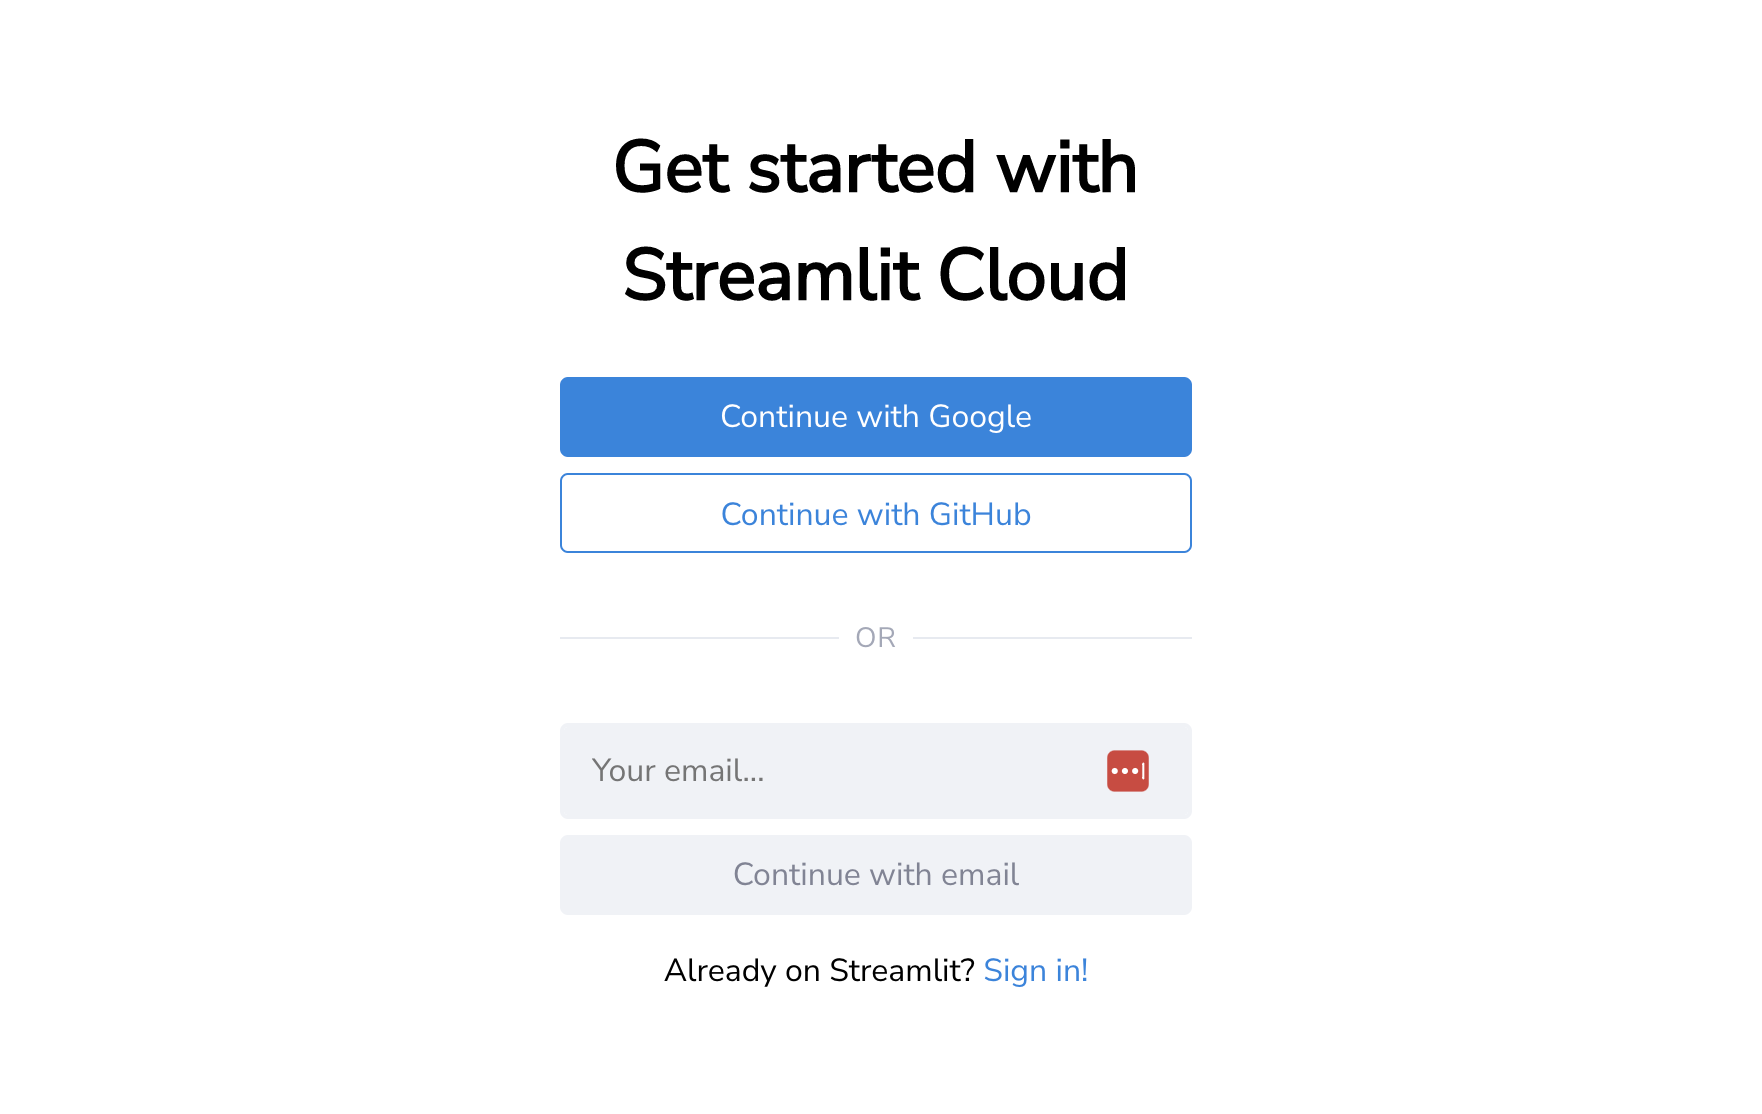

Follow the steps to authorize Streamlit with Github (If you are using the "Connect with Github" option) and fill in your details to create a user. 

From the main page, Click "New app" to create a new streamlit dashboard.

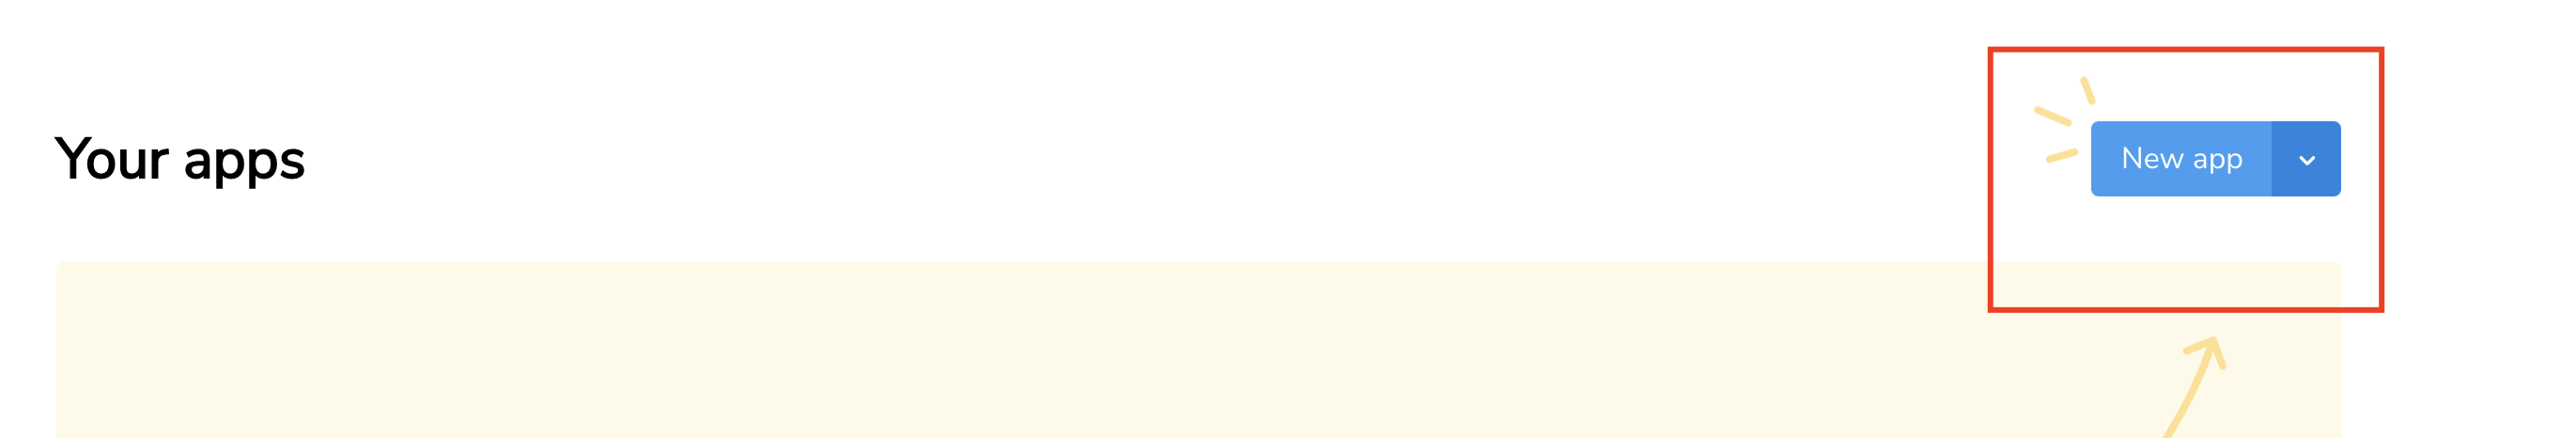

I've already created a sample repository which contains our dashboard here: https://github.com/apogiatzis/synthetic-tx-dashboard-streamlit

We will be using that for deployment below:

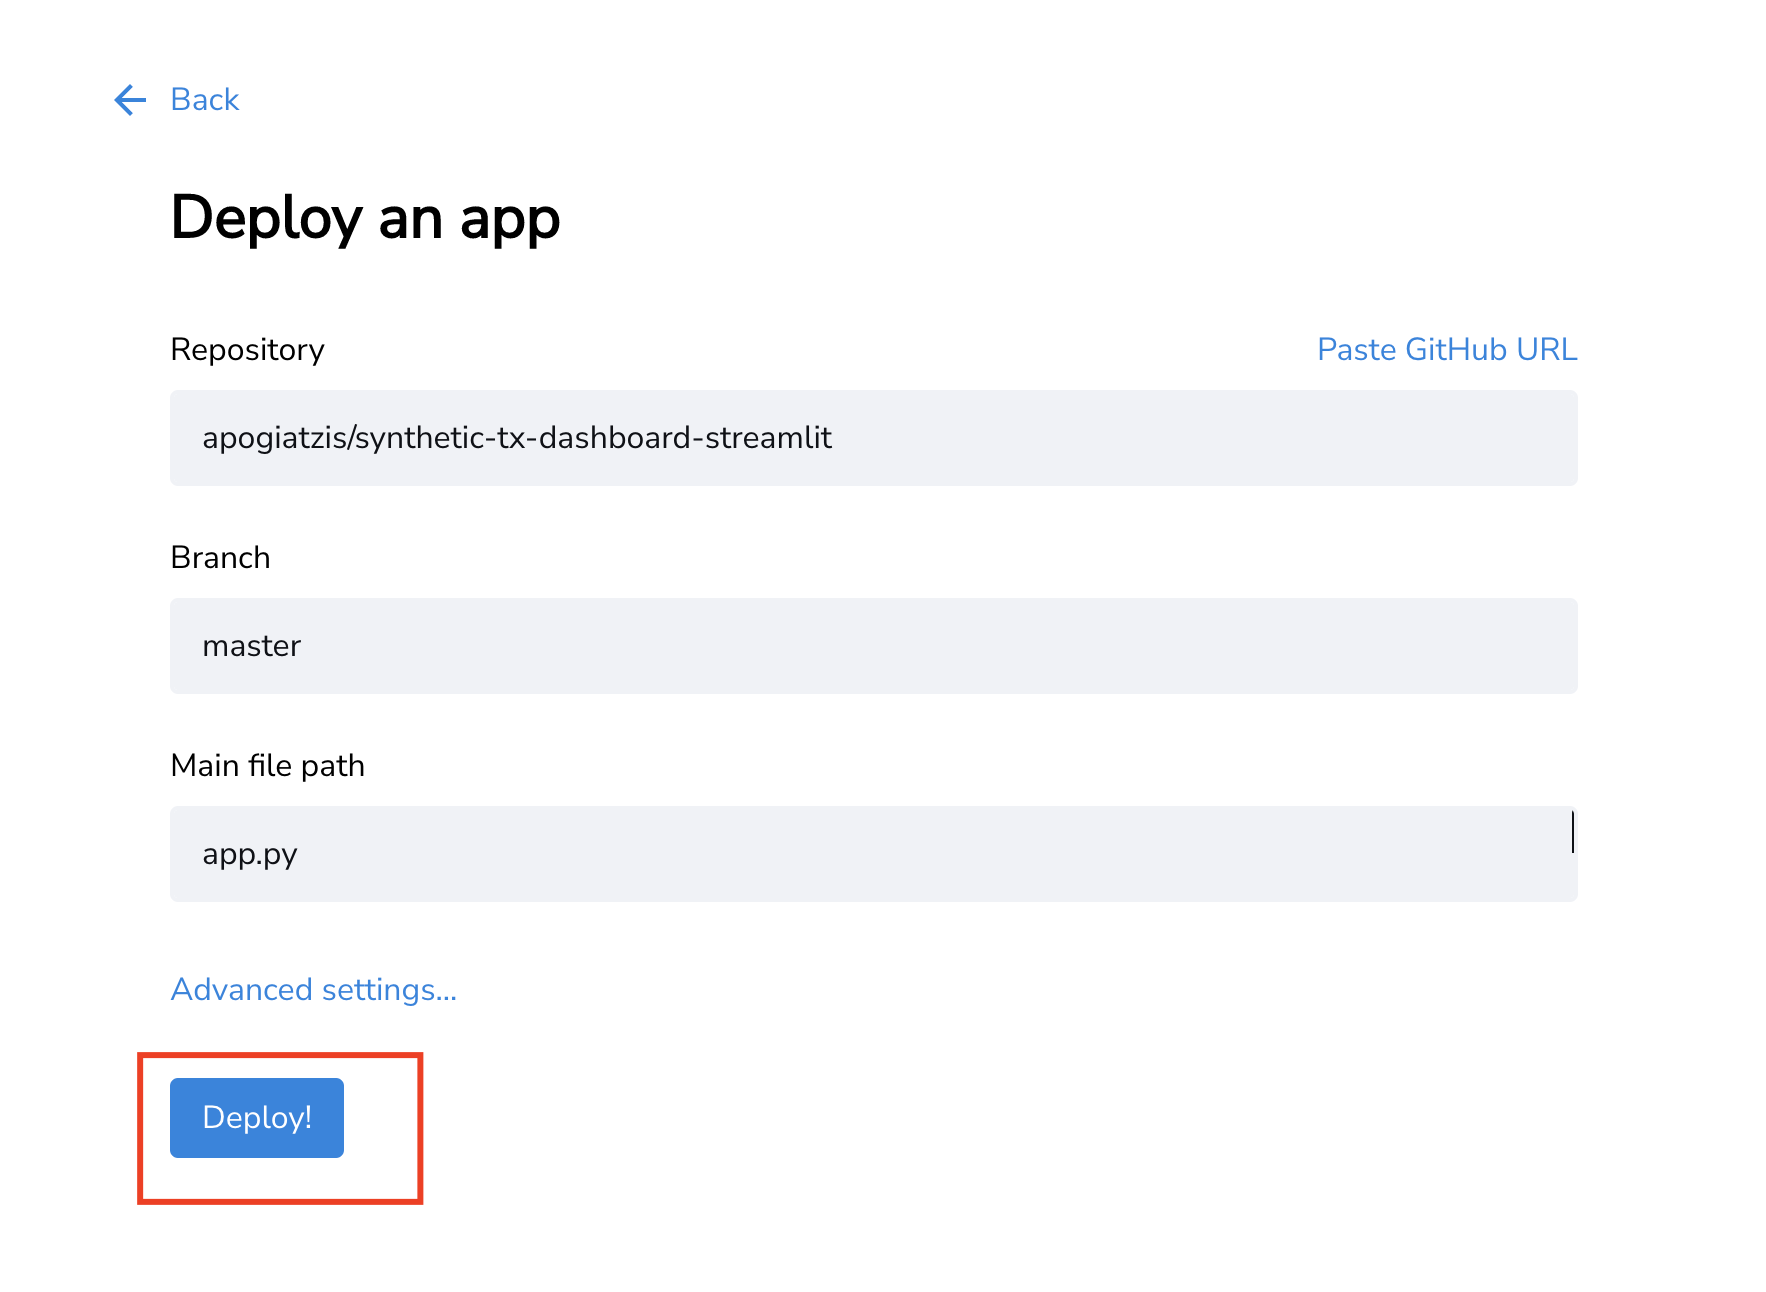

Click "Deploy" and wait until the application has been deployed. It might take. several minutes until it's completed.

Note how the dashboard has its own unique URL which we cna access it from:

https://apogiatzis-synthetic-tx-dashboard-streamlit-app-8d1sly.streamlit.app/

# Bonus Challenge:

Your task is to enhance the dashboard by incorporating Isolation Forest outlier detection, a powerful and efficient unsupervised machine learning algorithm for anomaly detection. For each new data addition, train an Isolation Forest model and annotate any suspicious transactions identified as outliers. Also, include the number of suspicious transactions identified in the dashboard.

Here are the high-level steps required to achieve this:

1. Import the necessary libraries and modules, such as scikit-learn's Isolation Forest.

2. Preprocess the data: Transform the categorical features of the transaction dataset (e.g., purpose, country) into a format suitable for the Isolation 3. Forest model, using techniques such as one-hot encoding.

3. Train the Isolation Forest model on the preprocessed transaction data.

4. Use the trained model to make predictions and identify outliers in the new transaction data.

5. Annotate the suspicious transactions in the dataset by adding an additional column, e.g., "is_outlier," marking the identified outliers with a value of 1 (and 0 for normal transactions).

6. Calculate and display the number of suspicious transactions identified in the dashboard.

7. Visualize the annotated suspicious transactions on the dashboard (start with just the number of suspicious transactions), for example, by using different colors or markers in the existing visualizations (e.g., Choropleth map, bar chart, time series visualization) to highlight the identified outliers.

By integrating Isolation Forest anomaly detection into your dashboard, you can provide users with valuable insights into potentially suspicious transactions, further enhancing the dashboard's effectiveness as a tool for detecting and combating financial crime.

In [ ]:
# Your code here.